<a href="https://colab.research.google.com/github/patilhar26/Python_ml_dl/blob/main/ICP_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
##-------------------------------------------------------------------------------------------------------------
# Student Name : Harshita Patil
# Code for Question 1
# Description:  Below program compares the performance (accuracy, loss) between Convolutional Neural Network models after and before adding the layers and doing the activation
#function changes as given in question.
##-------------------------------------------------------------------------------------------------------------
# Imported the necessary libraries and created our environment
# Keras is a high-level library.
# # importing Numpy provides a high-performance multidimensional array and,
# Basic tools to compute with and manipulate these arrays.
import numpy
# Importing cifar10 dataset. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
from keras.datasets import cifar10
# Sequential model is a linear stack of layers.
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
# Keras provides numpy utility library, which provides functions to perform actions on numpy arrays.
from keras.utils import np_utils
from keras import backend as K
# Sets the value of the image data format convention.
K.set_image_data_format('channels_last')

In [39]:
#Fix random seed for reproducibility
# Using numpy.random.seed function that sets the random seed of the Numpy
seed = 7
numpy.random.seed(seed)

In [40]:
# The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
# The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class
# Loading the data.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# printing the shape of the Data
print(X_train.shape[1:])

(32, 32, 3)


In [41]:
# Normalize inputs from 0-255 to 0.0-1.0
# Making sure that the values are float so that we can get decimal points after division
#convert data to float and scale values between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Original data is (0-255). Scale it to range [0,1].
X_train = X_train / 255.0
X_test = X_test / 255.0
yp=y_test


In [42]:
#One hot encode outputs
# one hot encoding is a representation of categorical variables as binary vectors. 
# np_utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [43]:
# Creating model....
# Sequential is a linear stack of layers.
model = Sequential()
# Convolutional layer,32 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 20%.
model.add(Dropout(0.2))
# Convolutional layer,32 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer.
model.add(Flatten())
# Fully connected layer with 512 units and a rectifier activation function.
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 50%.
model.add(Dropout(0.5))
# Fully connected output layer with 10 units and a Softmax activation function
model.add(Dense(num_classes, activation='softmax'))

In [44]:
# Compile the model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Printing model summary
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)              

In [45]:
#Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6957 - accuracy: 0.3877 - val_loss: 1.3904 - val_accuracy: 0.5072
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3417 - accuracy: 0.5179 - val_loss: 1.2496 - val_accuracy: 0.5562
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2136 - accuracy: 0.5695 - val_loss: 1.1618 - val_accuracy: 0.5888
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1417 - accuracy: 0.5944 - val_loss: 1.1072 - val_accuracy: 0.6115
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0839 - accuracy: 0.6160 - val_loss: 1.0779 - val_accuracy: 0.6192


In [46]:
#Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print('Test  loss:', scores[0])
print('Test  accuracy:', scores[1])


Accuracy: 61.92%
Test  loss: 1.0778902769088745
Test  accuracy: 0.6191999912261963


In [48]:
# Performance change
# Create model m1
m1 = Sequential()
# m1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
# Dropout layer at 20%.
m1.add(Dropout(0.2))
# Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
m1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Max Pool layer with size 2×2.
m1.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Dropout layer at 20%.
m1.add(Dropout(0.2))
# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Max Pool layer with size 2×2.
m1.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Dropout layer at 20%.
m1.add(Dropout(0.2))
# Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Max Pool layer with size 2×2.
m1.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer.
m1.add(Flatten())
# Dropout layer at 20%.
m1.add(Dropout(0.2))
# Fully connected layer with 1024 units and a rectifier activation function.
m1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 20%.
m1.add(Dropout(0.2))
# Fully connected layer with 512 units and a rectifier activation function.
m1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 20%.
m1.add(Dropout(0.2))
# Fully connected output layer with 10 units and a Softmax activation function
m1.add(Dense(num_classes, activation='softmax'))

In [49]:
# compile the model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = Adam(lr=lrate)
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# printing the summary of model m1
print(m1.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_31 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)       

In [50]:
# fitting the model
history = m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Epoch 1/5
391/391 [==============================] - 6s 16ms/step - loss: 2.8526 - accuracy: 0.0992 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 2/5
391/391 [==============================] - 6s 15ms/step - loss: 2.3034 - accuracy: 0.0967 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/5
391/391 [==============================] - 6s 15ms/step - loss: 2.3034 - accuracy: 0.0971 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/5
391/391 [==============================] - 6s 15ms/step - loss: 2.3032 - accuracy: 0.1017 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 5/5
391/391 [==============================] - 6s 15ms/step - loss: 2.3033 - accuracy: 0.1001 - val_loss: 2.3031 - val_accuracy: 0.1000


**Evaluating the Model**

In [51]:
# Evaluation of the model
scores = m1.evaluate(X_test, y_test, verbose=1)
# printing Test loss,test accuracy and Accuracy
print('Test  loss:', scores[0])
print('Test  accuracy:', scores[1])
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 2.3031 - accuracy: 0.1000
Test  loss: 2.3030784130096436
Test  accuracy: 0.10000000149011612
Accuracy: 10.00%


Prediction

In [52]:
#prediction
y=model.predict_classes(X_train[[1],:])
print(y[0])

9


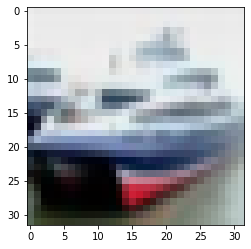

actual [8] predicted 1


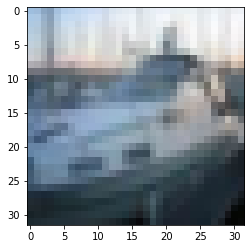

actual [8] predicted 8


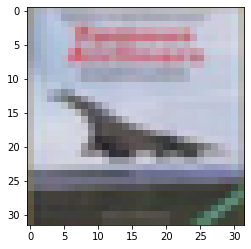

actual [0] predicted 8


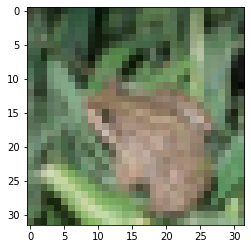

actual [6] predicted 4


In [56]:
##-------------------------------------------------------------------------------------------------------------
# Student Name : Harshita Patil
# Code for Question 2
# Description: A program to predict the 4 images of the test data, then to print the actual label for those 4 images 
# To check if the model predicted correctly or not.
##-------------------------------------------------------------------------------------------------------------

# Predicting the first four images of the test dataset
import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])  
  plt.show()
  y=model.predict_classes(X_test[[i],:])
  print("actual",yp[i],"predicted",y[0])

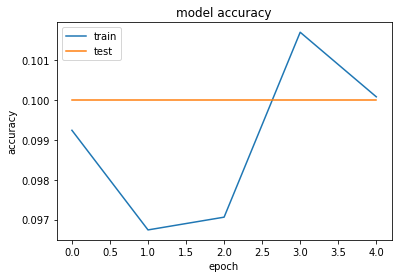

In [58]:
##-------------------------------------------------------------------------------------------------------------
# Student Name : Harshita Patil
# Code for Question 3
# Description: Visualizing the Loss and Accuracy using the history object.
##-------------------------------------------------------------------------------------------------------------

# Plotting History for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# Printing Title
plt.title('model accuracy')
# y label as loss
plt.ylabel('accuracy')
# x label as epoch
plt.xlabel('epoch')
# Placing a legend on 'train' and 'test'
plt.legend(['train', 'test'], loc='upper left')
# To show the graph
plt.show()

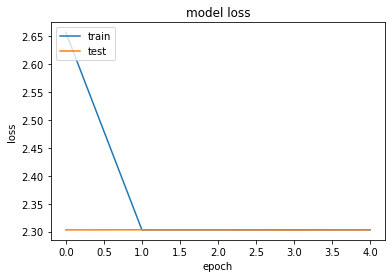

In [37]:
# Plotting History for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# Printing Title
plt.title('model loss')
# y label as loss
plt.ylabel('loss')
# x label as epoch
plt.xlabel('epoch')
# Placing a legend on 'train' and 'test'
plt.legend(['train', 'test'], loc='upper left')
# To show the graph
plt.show()

In [67]:
#saving the model in the format of .h5
m1.save("my_model.h5")

In [69]:
##-------------------------------------------------------------------------------------------------------------
# Student Name : Harshita Patil
# Code for BONUS QUESTION
# Description: Programming the question 2 - Using the saved model (.h5 model)
##-------------------------------------------------------------------------------------------------------------
#reading the saved format data
# Imported the necessary libarraies
import tensorflow as tf
from tensorflow import keras

#New model has the model data saved in h5 format
new_model = tf.keras.models.load_model('my_model.h5') 

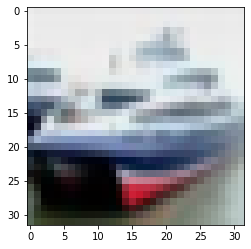

actual [8] predicted 2


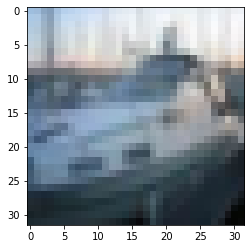

actual [8] predicted 2


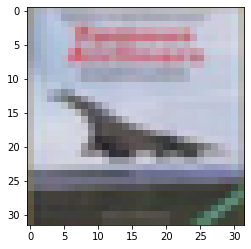

actual [0] predicted 2


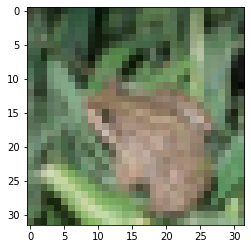

actual [6] predicted 2


In [70]:
#Bonus Question
#New model has the model data saved in h5 format

# Predicting the first four images of the h5 model
import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])  
  plt.show()
  y=new_model.predict_classes(X_test[[i],:])
  print("actual",yp[i],"predicted",y[0])